# Arquitetura

O projeto foi fortemente baseado [neste tutorial](http://adventuresinmachinelearning.com/keras-tutorial-cnn-11-lines/) sobre **Redes Convolucionais** utilizando o [Keras](https://keras.io/), e, portanto, inicialmente a arquitetura utilizada foi a mesma sugerida no post.


In [ ]:
%matplotlib inline
import io
import tarfile

import h5py

from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload


import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import random as rn

from keras.layers import (
    Dense,
    Flatten,
    Conv2D,
    MaxPooling2D,
    BatchNormalization,
    GaussianDropout,
    Activation
)
from keras.models import Sequential
from keras import regularizers

chess_dataset_h5 = 'UID do arquivo no drive'
chess_dataset_xz = 'UID do arquivo no drive'

In [ ]:
IMG_DIM = 227
IMG_DEEP = 1
LABELS = [
    'bb',
    'bk',
    'bn',
    'bp',
    'bq',
    'br',
    'empty',
    'wb',
    'wk',
    'wn',
    'wp',
    'wq',
    'wr'
]

NUM_CLASSES = len(LABELS)
BATCH_SIZE = 128
EPOCHS = 20


In [ ]:
# Algumas configurações para obter "resultados reproduzíveis"
np.random.seed(42)
rn.seed(54321)
session_config = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
tf.set_random_seed(1234)
sess = tf.Session(graph=tf.get_default_graph(), config=session_config)
keras.backend.set_session(sess)

Conjuntos de dados:

In [ ]:
def load_gray_data():
    print('Fazendo o download do conjunto de dados em grayscale... ', end=' ')
    drive_service = build('drive', 'v3')
    request = drive_service.files().get_media(fileId=chess_dataset_h5)
    h5data = io.BytesIO()
    downloader = MediaIoBaseDownload(h5data, request)
    done = False
    while done is False:
        _, done = downloader.next_chunk()
    h5data.seek(0)
    print('[ Pronto ]')
    with open('/tmp/h5data.hdf5', 'wb') as f:
        f.write(h5data.read())
    h5_file = h5py.File('/tmp/h5data.hdf5', 'r')
    train_data = h5_file['chess_imgs_train'][:]
    train_labels = h5_file['chess_labels_train'][:]
    test_data = h5_file['chess_imgs_test'][:]
    test_labels = h5_file['chess_labels_test'][:]
    h5_file.close()
    return (train_data, train_labels, test_data, test_labels)


def load_rgb_data():
    print('Fazendo o download do conjunto de dados em RGB... ', end=' ')
    drive_service = build('drive', 'v3')
    request = drive_service.files().get_media(fileId=chess_dataset_xz)
    h5data = io.BytesIO()
    downloader = MediaIoBaseDownload(h5data, request)
    done = False
    while done is False:
        _, done = downloader.next_chunk()
    h5data.seek(0)
    print('[ Pronto ]')
    print('Extraindo o conjunto de dados chess_dataset-rgb.h5 ...', end=' ')
    with tarfile.open(mode='r:xz', fileobj=h5data) as f:
        f.extractall('/tmp/')
    print('[ Pronto ]')
    h5_file = h5py.File('/tmp/chess_dataset-rgb.h5', 'r')
    train_data = h5_file['chess_imgs_train'][:]
    train_labels = h5_file['chess_labels_train'][:]
    test_data = h5_file['chess_imgs_test'][:]
    test_labels = h5_file['chess_labels_test'][:]
    h5_file.close()
    return (train_data, train_labels, test_data, test_labels)

In [ ]:
auth.authenticate_user()

Fazendo o download do conjunto de dados em grayscale...  [ Pronto ]
(10360, 227, 227)
(10360, 1)
(740, 227, 227)
(740, 1)
Train data index:  7270 Label:  wb (7)


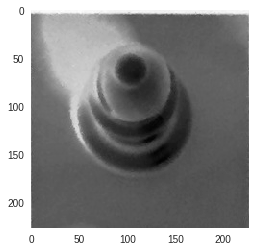

Test data index:  435 Label:  wn (9)


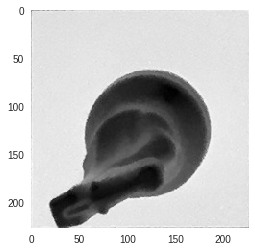

In [ ]:
train_data, train_labels, test_data, test_labels = load_gray_data()
# train_data, train_labels, test_data, test_labels = load_rgb_data()
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)
ichess_train = np.random.randint(train_data.shape[0])
print('Train data index: ', ichess_train, 'Label: ', LABELS[train_labels[ichess_train][0]], '({})'.format(train_labels[ichess_train][0]))
plt.imshow(train_data[ichess_train])
plt.grid(False)
plt.show()

ichess_test = np.random.randint(test_data.shape[0])
print('Test data index: ', ichess_test, 'Label: ', LABELS[test_labels[ichess_test][0]], '({})'.format(test_labels[ichess_test][0]))
plt.imshow(test_data[ichess_test])
plt.grid(False)
pass

In [ ]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []
        self.val_acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))


def make_model():
    data_format = 'channels_last'
    padding = 'same'
#     kernel_regularizer = regularizers.l2(0.02)
    kernel_regularizer = None
    model = Sequential()
    
#     model.add(Conv2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu', kernel_regularizer=kernel_regularizer, input_shape=(IMG_DIM, IMG_DIM, IMG_DEEP)))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding=padding))
    
#     model.add(Conv2D(128, kernel_size=(5, 5), activation='relu', kernel_regularizer=kernel_regularizer))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size=(2, 2), padding=padding))
    
#     model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=kernel_regularizer))
#     model.add(MaxPooling2D(pool_size=(2, 2), padding=padding))
#     model.add(BatchNormalization())

#     model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=kernel_regularizer))
#     model.add(MaxPooling2D(pool_size=(2, 2), padding=padding))
#     model.add(BatchNormalization())
        
#     model.add(Flatten())
#     model.add(Dense(2000, activation='relu'))
#     model.add(GaussianDropout(0.5))
    
#     model.add(Dense(2000, activation='relu'))
#     model.add(GaussianDropout(0.5))

#     model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='relu', kernel_regularizer=kernel_regularizer, input_shape=(IMG_DIM, IMG_DIM, IMG_DEEP)))
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding=padding))
#     model.add(BatchNormalization())
    
#     model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', kernel_regularizer=kernel_regularizer))
#     model.add(MaxPooling2D(pool_size=(2, 2), padding=padding))
#     model.add(BatchNormalization())
    
#     model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', kernel_regularizer=kernel_regularizer))
#     model.add(MaxPooling2D(pool_size=(2, 2), padding=padding))
#     model.add(BatchNormalization())

#     model.add(Conv2D(64, kernel_size=(5, 5), activation='relu', kernel_regularizer=kernel_regularizer))
#     model.add(MaxPooling2D(pool_size=(2, 2), padding=padding))
#     model.add(BatchNormalization())
    
#     model.add(Flatten())
#     model.add(Dense(1000, activation='relu'))
#     model.add(GaussianDropout(0.5))

################### Modelo Final ###############################################
#     model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='relu', kernel_regularizer=kernel_regularizer, input_shape=(IMG_DIM, IMG_DIM, IMG_DEEP)))
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding=padding))
#     model.add(BatchNormalization())
    
#     model.add(Conv2D(64, kernel_size=(5, 5), kernel_regularizer=kernel_regularizer))
#     model.add(MaxPooling2D(pool_size=(2, 2), padding=padding))
#     model.add(BatchNormalization())
    
#     model.add(Conv2D(64, kernel_size=(5, 5), kernel_regularizer=kernel_regularizer))
#     model.add(MaxPooling2D(pool_size=(2, 2), padding=padding))
#     model.add(BatchNormalization())

#     model.add(Conv2D(64, kernel_size=(5, 5), kernel_regularizer=kernel_regularizer))
#     model.add(MaxPooling2D(pool_size=(2, 2), padding=padding))
#     model.add(BatchNormalization())

#     model.add(Conv2D(64, kernel_size=(5, 5), kernel_regularizer=kernel_regularizer))
#     model.add(MaxPooling2D(pool_size=(2, 2), padding=padding))
#     model.add(BatchNormalization())
###################################################################################

##################### Modelo Novo Teste ###########################################
    model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), kernel_regularizer=kernel_regularizer, input_shape=(IMG_DIM, IMG_DIM, IMG_DEEP)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding=padding))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, kernel_size=(5, 5), kernel_regularizer=kernel_regularizer))
    model.add(MaxPooling2D(pool_size=(2, 2), padding=padding))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(64, kernel_size=(5, 5), kernel_regularizer=kernel_regularizer))
    model.add(MaxPooling2D(pool_size=(2, 2), padding=padding))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(64, kernel_size=(5, 5), kernel_regularizer=kernel_regularizer))
    model.add(MaxPooling2D(pool_size=(2, 2), padding=padding))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(64, kernel_size=(5, 5), kernel_regularizer=kernel_regularizer))
    model.add(MaxPooling2D(pool_size=(2, 2), padding=padding))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
###################################################################################


    model.add(Flatten())
    model.add(Dense(1000, activation='relu'))
    model.add(GaussianDropout(0.5))

#     model.add(Dense(1000, activation='relu'))
#     model.add(GaussianDropout(0.5))

    model.add(Dense(NUM_CLASSES, activation='softmax'))

    return model


def compile_model(model):
    model.compile(
        loss=keras.losses.categorical_crossentropy,
        optimizer=keras.optimizers.Adam(),
#        optimizer=keras.optimizers.SGD(lr=0.01),
        metrics=['accuracy']
    )


def prepare_samples(X, Y):
    #print('X shape: ', X.shape)
    x = X.reshape(X.shape[0], IMG_DIM, IMG_DIM, IMG_DEEP).astype('float32')
    # Normalization
    x /= 255
    y = keras.utils.to_categorical(Y, NUM_CLASSES)
    return (x, y)


def train(model, X, y, X_test=None, y_test=None):
    x_train, y_train = prepare_samples(X, y)
    x_val = None
    y_val = None
    if X_test is not None and y_test is not None:
        x_val, y_val = prepare_samples(X_test, y_test)
    history = AccuracyHistory()
    model.fit(
        x_train,
        y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=(x_val, y_val),
        callbacks=[history]
    )
    return history


def score(model, X, y):
    x_test, y_test = prepare_samples(X, y)
    return model.evaluate(x_test, y_test, verbose=0)


Montando a arquitetura da rede:

In [ ]:
cnn_model = make_model()

In [ ]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 223, 223, 32)      832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 112, 112, 32)      128       
_________________________________________________________________
activation_1 (Activation)    (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 108, 108, 64)      51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 54, 54, 64)        256       
__________

Tentar usar a GPU para treinamento:

In [ ]:
device_name = tf.test.gpu_device_name()
device = '/gpu:0'
print('GPU? ', device_name)
if device_name != '/device:GPU:0':
  device = '/cpu:0'
print('Usando ', device)


GPU?  /device:GPU:0
Usando  /gpu:0


Treinando a rede (isso vai levar algum tempo), para tanto vamos tentar usar a GPU disponibilizada pelo Colab:

Train on 10360 samples, validate on 740 samples
Epoch 1/20
10360/10360 [==============================] - 31s 3ms/step - loss: 0.9251 - acc: 0.6769 - val_loss: 3.8216 - val_acc: 0.1527
Epoch 2/20
10360/10360 [==============================] - 30s 3ms/step - loss: 0.5644 - acc: 0.7821 - val_loss: 3.2542 - val_acc: 0.2878
Epoch 3/20
10360/10360 [==============================] - 30s 3ms/step - loss: 0.4416 - acc: 0.8337 - val_loss: 2.4067 - val_acc: 0.4270
Epoch 4/20
10360/10360 [==============================] - 30s 3ms/step - loss: 0.3444 - acc: 0.8715 - val_loss: 2.4785 - val_acc: 0.4784
Epoch 5/20
10360/10360 [==============================] - 30s 3ms/step - loss: 0.2468 - acc: 0.9077 - val_loss: 4.5725 - val_acc: 0.3797
Epoch 6/20
10360/10360 [==============================] - 30s 3ms/step - loss: 0.2226 - acc: 0.9193 - val_loss: 2.6310 - val_acc: 0.5243
Epoch 7/20
10360/10360 [==============================] - 30s 3ms/step - loss: 0.1758 - acc: 0.9333 - val_loss: 1.6794 - val_acc: 

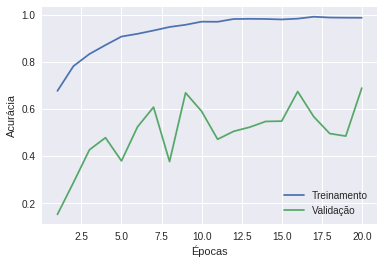

In [ ]:
compile_model(cnn_model)
with tf.device(device):
  history = train(cnn_model, train_data, train_labels, test_data, test_labels)

x_acc = range(1, EPOCHS+1)
plt.plot(x_acc, history.acc, x_acc, history.val_acc)
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(('Treinamento', 'Validação'))
pass

Testando:

In [ ]:
with tf.device(device):
  net_score = score(cnn_model, test_data, test_labels)
  print('Test loss:', net_score[0])
  print('Test accuracy:', net_score[1])

Test loss: 1.9297375765503257
Test accuracy: 0.6891891891891891


**Melhor acurácia**: 69.46%  
**Melhor acurácia**: 67.57%  
**Melhor acurácia**: 66.62%

1.555229185078595


In [ ]:
# from google.colab import files

# # Save Keras model
# cnn_model.save('/tmp/best_6946.h5')
# print('Model saved...')

# # Download file
# files.download('/tmp/best_6946.h5')